Install Required Libraries

In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


Import Libraries

In [3]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

Import Data Sets

In [4]:
df = pd.read_csv("Affordable_Housing_Production_by_Project_20231117.csv")
df2 = pd.read_csv("Affordable_Housing_Production_by_Building_20231117.csv")
pd.set_option('display.max_columns', None)

Make sure our datasets match

In [5]:
df["Total Units"].sum()

325598

In [6]:
df2["Total Units"].sum()

325598

Compute percentage of unfinished housing. The amount of unfinished housing varies by dataset before we drop the NA values on the Project Completion Date Column.

In [7]:
unfinished_housing = df[df["Project Completion Date"].isna()]["Total Units"].sum()/df["Total Units"].sum()
unfinished_housing = unfinished_housing*100
print(f"{unfinished_housing:,.2f}%")

41.45%


Clean Data to get just completed housing

In [8]:
df = df.dropna(subset=["Project Completion Date"])
df2 = df2.dropna(subset=["Project Completion Date"])

Make sure our datasets still match

In [9]:
df["Total Units"].sum()

190653

In [10]:
df["Total Units"].sum()

190653

Convert project start and end dates to datetime objects to enable us to perform alculations with them. We also added start and end years for grouping purposes

In [11]:
df['Project Start Date'] = pd.to_datetime(df['Project Start Date'], format='%m/%d/%Y')
df['Project Completion Date'] = pd.to_datetime(df['Project Completion Date'], format='%m/%d/%Y')

df2['Project Start Date'] = pd.to_datetime(df['Project Start Date'], format='%m/%d/%Y')
df2['Project Completion Date'] = pd.to_datetime(df['Project Completion Date'], format='%m/%d/%Y')

df['Project Duration'] = (df['Project Completion Date'] - df['Project Start Date']).dt.days
df2['Project Duration'] = (df2['Project Completion Date'] - df2['Project Start Date']).dt.days

In [12]:
df2['Project Start Year'] = df2['Project Start Date'].dt.year
df2['Project End Year'] = df2['Project Completion Date'].dt.year

df['Project Start Year'] = df['Project Start Date'].dt.year
df['Project End Year'] = df['Project Completion Date'].dt.year
finished_housing = pd.DataFrame(df2)


Confirm The Total Housing of the 2 sets is equal so we know our calculations will be correct and we dropped the same data from each set.

In [13]:
df["Total Units"].sum()

190653

In [14]:
df2["Total Units"].sum()

190653

In [15]:
Highest_owner_units = df.groupby('Project Name').sum().reset_index()
Highest_owner_units.sort_values('Counted Homeownership Units', ascending=False)

,Project Name,Project ID,Extremely Low Income Units,Very Low Income Units,Low Income Units,Moderate Income Units,Middle Income Units,Other Income Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units,Senior Units,Project Duration,Project Start Year,Project End Year
1522,PENN SOUTH,63839,424,380,388,542,455,0,0,2189,2189,2820,0,0,2017,2017
1178,"CONCOURSE VILLAGE, INC.HRP.FY21",69877,0,506,1366,0,0,2,0,1874,1874,1874,0,924,2020,2023
1180,CONFIDENTIAL,86551257,122,218,1034,307,106,3,156,1634,1790,1791,118,60516,2705729,2705888
1210,DAYTON BEACH PARK,66588,0,1029,120,0,0,0,0,1149,1149,1149,0,1310,2017,2021
1435,MASARYK TOWERS,67427,0,1107,0,0,0,2,0,1109,1109,1109,0,731,2018,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,3216 CRUGER AVENUE,71153,0,0,0,0,3,0,3,0,3,8,0,0,2021,2021
590,3214 CRUGER AVENUE,70855,0,0,0,0,3,0,3,0,3,8,0,95,2021,2021
589,321 East 60th Street,54366,0,0,20,0,0,0,20,0,20,21,0,868,2015,2017
588,3208 GLENWOOD ROAD,68626,0,0,0,0,3,0,3,0,3,9,0,211,2019,2020


## Questions 
### How Many Projects Are Completed Each Year?

The number of projects completed each year drastically increased in 2019-2022.

I have generated both a table with exact numbers and a bar chart to visualize.


In [16]:
finished_housing.groupby('Project End Year')['Project ID'].nunique()

Project End Year
2014.0     68
2015.0     52
2016.0     93
2017.0    136
2018.0    117
2019.0    187
2020.0    136
2021.0    168
2022.0    269
2023.0    150
Name: Project ID, dtype: int64

<AxesSubplot:xlabel='Project End Year'>

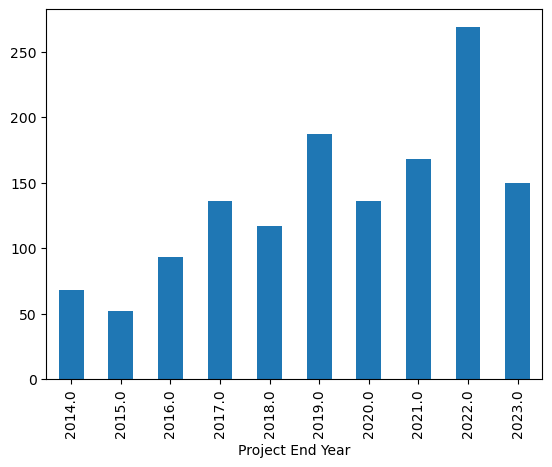

In [17]:
finished_housing.groupby('Project End Year')['Project ID'].nunique().plot.bar(x="Project End Year",y="Project ID")

## Has project completetion time increased or decreased over time?

It has significantly decreased over time, going from 700-800 days to complete in 2014-2015 to 108 days in 2023.


In [18]:
year_groups = finished_housing.groupby('Project Start Year')
time_to_finish = round(year_groups['Project Duration'].mean(),2)

year_groups_df = pd.DataFrame(year_groups)

duration_per_year = pd.DataFrame(time_to_finish).reset_index()

duration_per_year.columns = ['Project Start Year', 'Average Project Duration']

duration_per_year

,Project Start Year,Average Project Duration
0,2014.0,277.53
1,2015.0,424.70
2,2016.0,359.94
3,2017.0,258.20
4,2018.0,322.45
5,2019.0,274.11
6,2020.0,302.87
7,2021.0,242.64
8,2022.0,120.45
9,2023.0,16.06


#### Create scatterplots showing project duration by project start year

<AxesSubplot:xlabel='Project Start Year'>

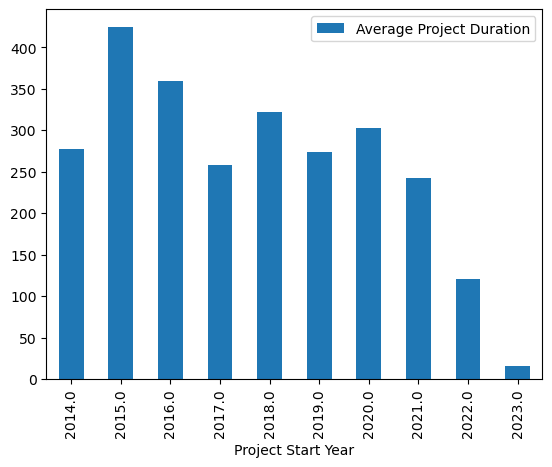

In [19]:
duration_per_year.plot.bar(x='Project Start Year', y='Average Project Duration')

#### However if we remove projects that took zero days to finish the results are very different

<AxesSubplot:xlabel='Project Start Year'>

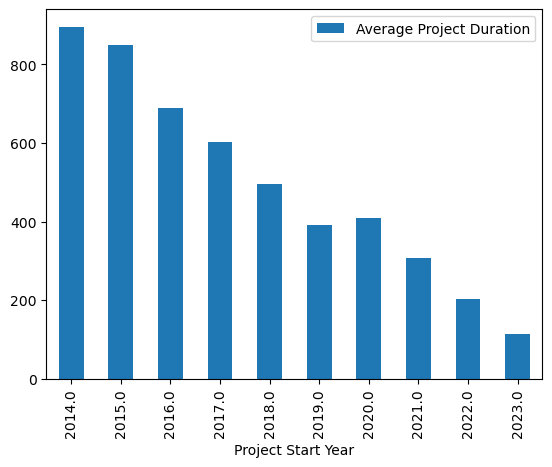

In [20]:
zero_day_projects = finished_housing[finished_housing["Project Duration"] !=0].groupby('Project Start Year')
time_to_finish = zero_day_projects['Project Duration'].mean()

zero_day_groups_df = pd.DataFrame(zero_day_projects)

duration_per_year = pd.DataFrame(time_to_finish).reset_index()

duration_per_year.columns = ['Project Start Year', 'Average Project Duration']

duration_per_year
duration_per_year.plot.bar(x='Project Start Year', y='Average Project Duration')

<AxesSubplot:xlabel='Project Start Year'>

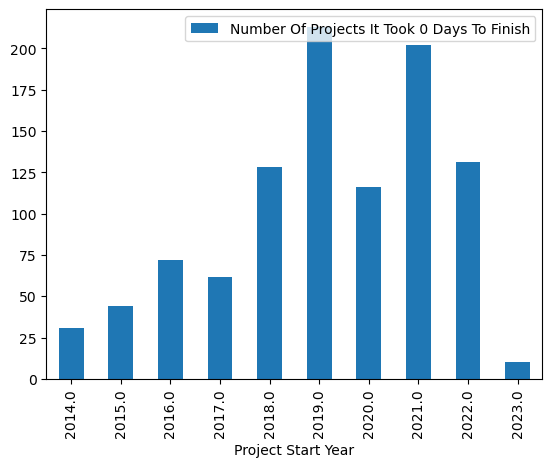

In [21]:
greater_than_zero_groups = finished_housing[finished_housing["Project Duration"] > 0].groupby('Project Start Year')
time_to_finish = greater_than_zero_groups['Project Duration'].count()

year_groups_df = pd.DataFrame(greater_than_zero_groups)

greater_than_zero_per_year = pd.DataFrame(time_to_finish).reset_index()

greater_than_zero_per_year.columns = ['Project Start Year', 'Number Of Projects It Took 0 Days To Finish']

greater_than_zero_per_year.plot.bar(x='Project Start Year', y='Number Of Projects It Took 0 Days To Finish')

#### Number of projects it took 0 days to finish

<AxesSubplot:xlabel='Project Start Year'>

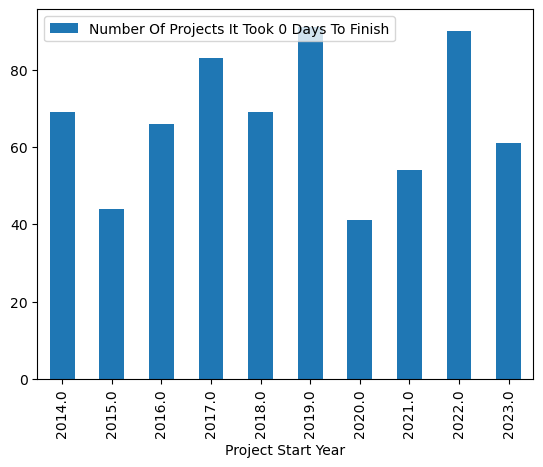

In [22]:
zero_day_groups = finished_housing[finished_housing["Project Duration"] == 0].groupby('Project Start Year')
time_to_finish = zero_day_groups['Project Duration'].count()

year_groups_df = pd.DataFrame(zero_day_groups)

zero_day_projects_per_year = pd.DataFrame(time_to_finish).reset_index()

zero_day_projects_per_year.columns = ['Project Start Year', 'Number Of Projects It Took 0 Days To Finish']

zero_day_projects_per_year.plot.bar(x='Project Start Year', y='Number Of Projects It Took 0 Days To Finish')

## How Many Units Are Completed Each Year?

#### Total Units

As we can see, starting in 2019 and going through 2022, units completed each year has increased drastically, however there has been a drop in 2023. Our hypothesis is that this is due to the economic downturn during the covid pandemic od 2020-2022, although there was n uptick before that just not as large.

We have generated both a table showing the number of units, as well as a bar chart for easy visualization.


In [23]:
finished_housing.groupby('Project Start Year')['Total Units'].sum()

Project Start Year
2014.0     2410
2015.0     1599
2016.0     2222
2017.0     3407
2018.0     3584
2019.0    11037
2020.0     9109
2021.0     7171
2022.0    10234
2023.0     3551
Name: Total Units, dtype: int64

<AxesSubplot:xlabel='Project Start Year'>

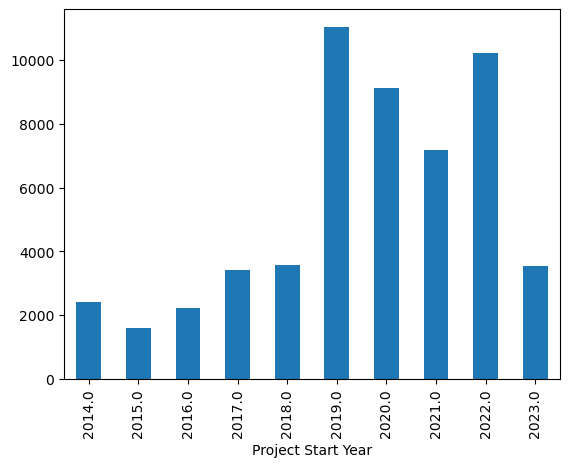

In [24]:
finished_housing.groupby('Project Start Year')['Total Units'].sum().plot.bar(x='Project Start Year', y='Total Units')


In [25]:
finished_housing.groupby('Project End Year')['Total Units'].sum()

Project End Year
2014.0     1764
2015.0      442
2016.0     1991
2017.0     2749
2018.0     2560
2019.0     8498
2020.0     4925
2021.0     7962
2022.0    15581
2023.0     7852
Name: Total Units, dtype: int64

<AxesSubplot:xlabel='Project End Year'>

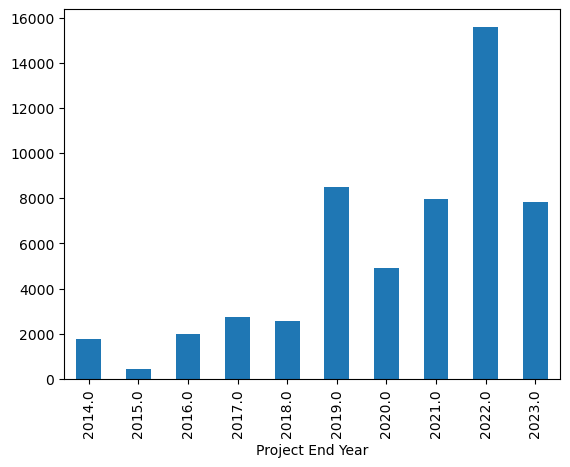

In [26]:
finished_housing.groupby('Project End Year')['Total Units'].sum().plot.bar(x='Project Start Year', y='Total Units')


In [27]:
table = finished_housing.corr(method ='pearson')

coolmap_table = table.style.background_gradient(cmap='coolwarm')
coolmap_table

,Project ID,Building ID,Postcode,BBL,BIN,Council District,Latitude,Longitude,Latitude (Internal),Longitude (Internal),Extremely Low Income Units,Very Low Income Units,Low Income Units,Moderate Income Units,Middle Income Units,Other Income Units,Studio Units,1-BR Units,2-BR Units,3-BR Units,4-BR Units,5-BR Units,6-BR+ Units,Unknown-BR Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units,Project Duration,Project Start Year,Project End Year
Project ID,1.000000,0.166267,0.003708,0.037303,0.046275,-0.025127,0.050101,-0.050578,0.049004,-0.047703,-0.030208,0.014198,-0.122646,0.005484,0.028469,-0.119626,-0.041915,-0.030609,-0.062775,-0.023610,-0.045234,-0.017106,0.004166,-0.036424,-0.070867,0.002679,-0.063458,-0.037610,0.167419,-0.676889,-0.595137
Building ID,0.166267,1.000000,0.382211,0.404082,0.453619,0.342384,-0.314143,0.119495,-0.315603,0.120125,0.012761,0.000152,0.052481,0.015242,0.097802,-0.118556,0.103824,0.070852,0.044701,-0.025576,-0.085454,-0.015989,-0.023300,-0.014634,0.082527,-0.009038,0.070978,0.140928,0.035136,-0.045540,-0.026992
Postcode,0.003708,0.382211,1.000000,0.912323,0.917294,0.905007,-0.760991,0.213298,-0.760650,0.214361,-0.097765,-0.058875,-0.092286,-0.066530,-0.076219,-0.183015,-0.074033,-0.154669,-0.135941,-0.078498,-0.059915,0.011936,-0.023017,-0.003689,-0.154270,-0.034766,-0.157924,-0.138974,0.005963,-0.066261,-0.063952
BBL,0.037303,0.404082,0.912323,1.000000,0.990870,0.850664,-0.677161,0.207482,-0.677112,0.207703,-0.051605,-0.040647,-0.050785,-0.051059,-0.076591,-0.141367,-0.044361,-0.108293,-0.099766,-0.069636,-0.064551,0.012399,-0.024347,0.029704,-0.099119,-0.030987,-0.105548,-0.101165,-0.004143,-0.091916,-0.093083
BIN,0.046275,0.453619,0.917294,0.990870,1.000000,0.855587,-0.698484,0.202888,-0.698448,0.203045,-0.053880,-0.038304,-0.045885,-0.045384,-0.064233,-0.151549,-0.040294,-0.099234,-0.090307,-0.066724,-0.066498,0.010894,-0.023901,0.026587,-0.091415,-0.028060,-0.097099,-0.083158,-0.003770,-0.079637,-0.080974
Council District,-0.025127,0.342384,0.905007,0.850664,0.855587,1.000000,-0.831595,0.004737,-0.831300,0.006304,-0.092450,-0.090318,-0.120535,-0.070531,-0.107271,-0.192218,-0.097098,-0.183840,-0.172422,-0.095998,-0.053808,-0.012243,-0.019155,0.010529,-0.172974,-0.063581,-0.187465,-0.180116,0.025343,-0.097213,-0.087790
Latitude,0.050101,-0.314143,-0.760991,-0.677161,-0.698484,-0.831595,1.000000,0.210204,0.999987,0.210906,0.049262,0.029740,0.056116,0.035636,-0.019590,0.212828,0.053840,0.047382,0.065885,0.049917,0.040104,-0.023056,0.012141,-0.031223,0.083591,-0.023883,0.065423,0.034453,-0.017244,0.048448,0.042363
Longitude,-0.050578,0.119495,0.213298,0.207482,0.202888,0.004737,0.210204,1.000000,0.211002,0.999949,-0.051079,0.078871,-0.013160,-0.021403,-0.098002,0.033873,-0.051874,-0.054348,0.006423,0.066337,-0.015327,0.061474,-0.003013,-0.054529,-0.030615,-0.023677,-0.039253,-0.129709,0.000461,0.002358,0.004027
Latitude (Internal),0.049004,-0.315603,-0.760650,-0.677112,-0.698448,-0.831300,0.999987,0.211002,1.000000,0.210994,0.048622,0.030457,0.055459,0.032115,-0.019459,0.214138,0.052470,0.046321,0.064870,0.049099,0.039658,-0.023362,0.012244,-0.031307,0.082433,-0.023743,0.064149,0.033452,-0.019327,0.054005,0.047099
Longitude (Internal),-0.047703,0.120125,0.214361,0.207703,0.203045,0.006304,0.210906,0.999949,0.210994,1.000000,-0.052860,0.077309,-0.013139,-0.018919,-0.097631,0.030324,-0.053962,-0.054761,0.007399,0.067515,-0.014387,0.061504,-0.003263,-0.054594,-0.030998,-0.024023,-0.039825,-0.129976,0.001837,0.002646,0.004959


Scatterplots showing the amount of units by amount of bedrooms in relation to the tota

<AxesSubplot:xlabel='6-BR+ Units', ylabel='Total Units'>

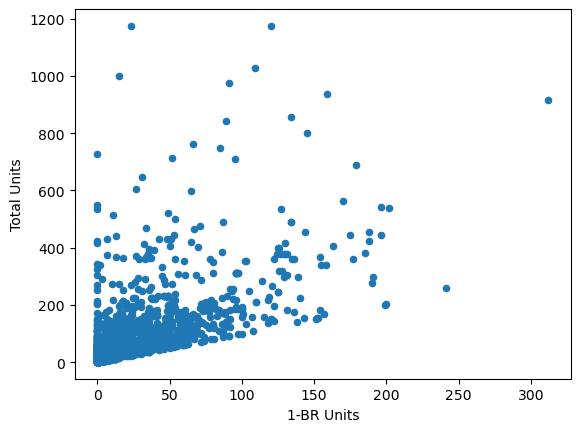

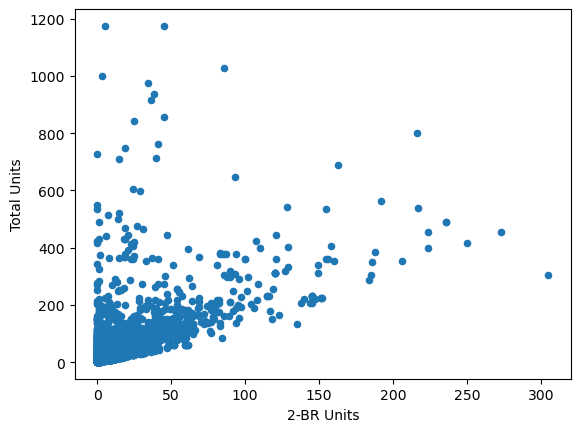

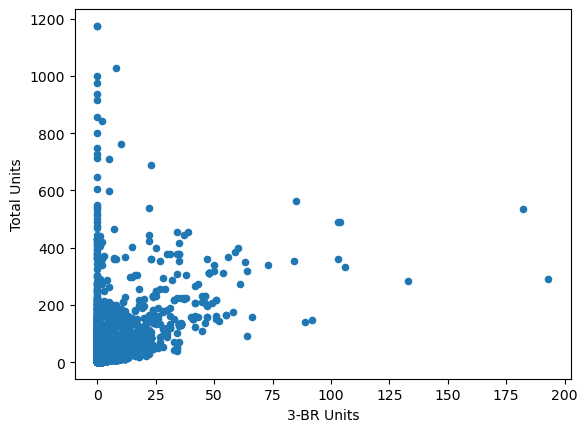

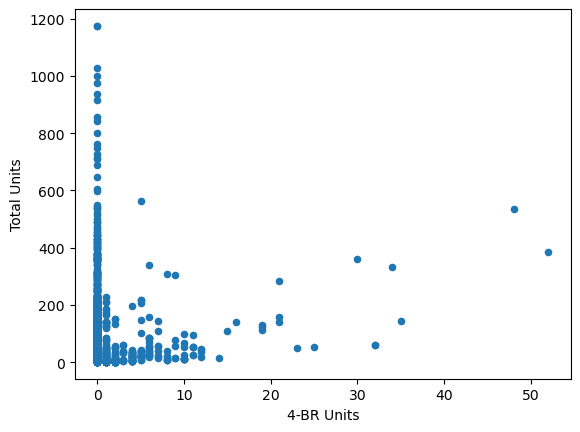

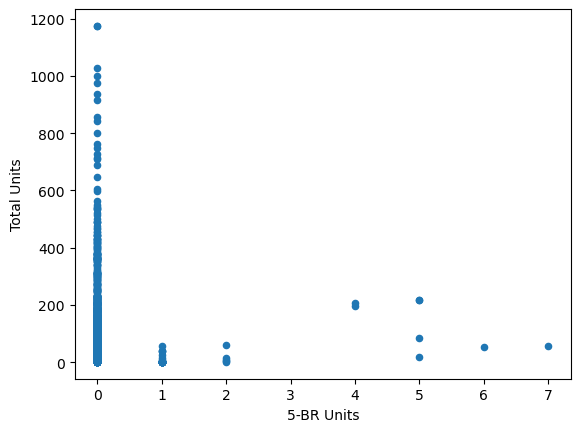

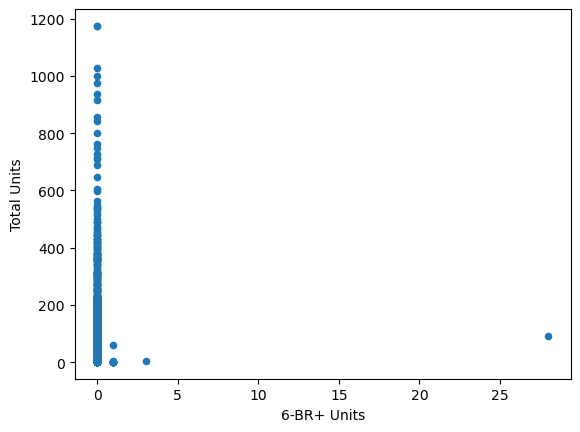

In [28]:
finished_housing.plot.scatter(x='1-BR Units', y='Total Units')
finished_housing.plot.scatter(x='2-BR Units', y='Total Units')
finished_housing.plot.scatter(x='3-BR Units', y='Total Units')
finished_housing.plot.scatter(x='4-BR Units', y='Total Units')
finished_housing.plot.scatter(x='5-BR Units', y='Total Units')
finished_housing.plot.scatter(x='6-BR+ Units', y='Total Units')

### Bar Charts Showing what boroughs the housing types are located in

<AxesSubplot:xlabel='Borough'>

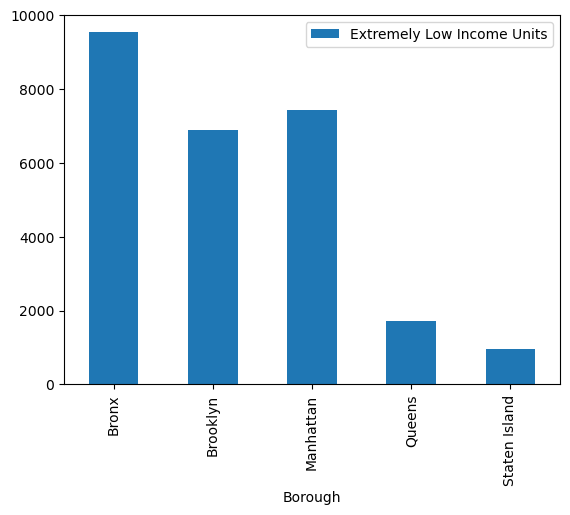

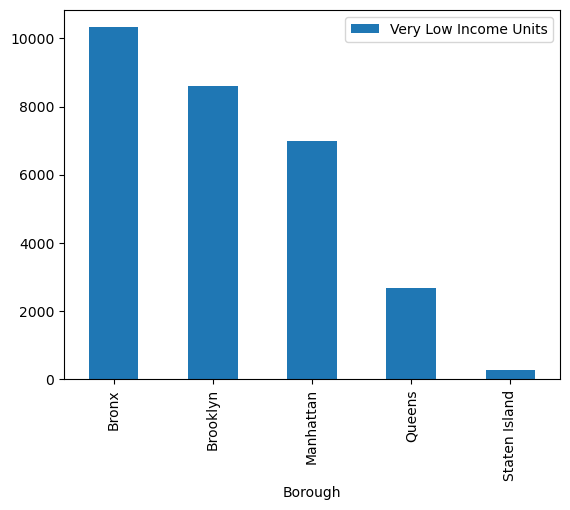

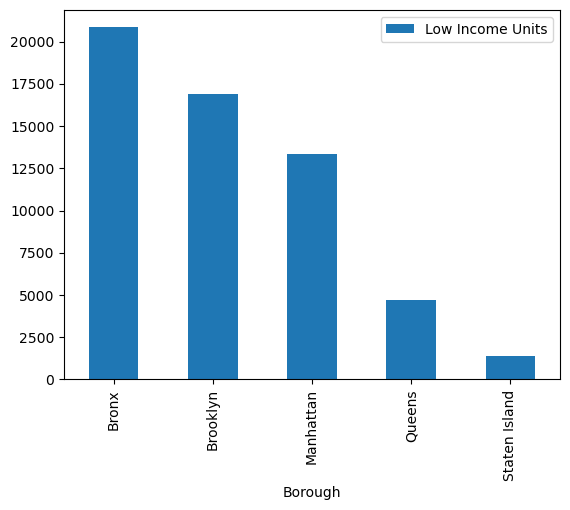

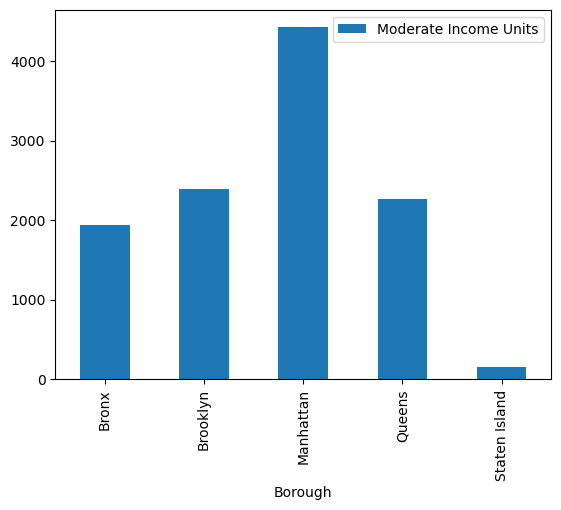

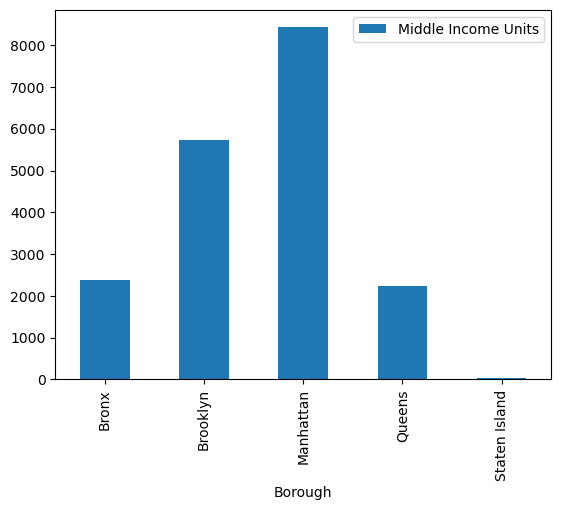

In [29]:
borough_group = finished_housing.groupby('Borough')
num_units = borough_group['Extremely Low Income Units'].sum()
borough_group_df = pd.DataFrame(borough_group)
units_per_borough = pd.DataFrame(num_units).reset_index()
units_per_borough.columns = ['Borough', 'Extremely Low Income Units']
units_per_borough.plot.bar(x="Borough", y="Extremely Low Income Units")

borough_group = finished_housing.groupby('Borough')
num_units = borough_group['Very Low Income Units'].sum()
borough_group_df = pd.DataFrame(borough_group)
units_per_borough = pd.DataFrame(num_units).reset_index()
units_per_borough.columns = ['Borough', 'Very Low Income Units']
units_per_borough.plot.bar(x="Borough", y="Very Low Income Units")

borough_group = finished_housing.groupby('Borough')
num_units = borough_group['Low Income Units'].sum()
borough_group_df = pd.DataFrame(borough_group)
units_per_borough = pd.DataFrame(num_units).reset_index()
units_per_borough.columns = ['Borough', 'Low Income Units']
units_per_borough.plot.bar(x="Borough", y="Low Income Units")

borough_group = finished_housing.groupby('Borough')
num_units = borough_group['Moderate Income Units'].sum()
borough_group_df = pd.DataFrame(borough_group)
units_per_borough = pd.DataFrame(num_units).reset_index()
units_per_borough.columns = ['Borough', 'Moderate Income Units']
units_per_borough.plot.bar(x="Borough", y="Moderate Income Units")

borough_group = finished_housing.groupby('Borough')
num_units = borough_group['Middle Income Units'].sum()
borough_group_df = pd.DataFrame(borough_group)
units_per_borough = pd.DataFrame(num_units).reset_index()
units_per_borough.columns = ['Borough', 'Middle Income Units']
units_per_borough.plot.bar(x="Borough", y="Middle Income Units")

### What is the breakdown of these units? By size? By affordability levels?

By Size

In [30]:
size = df.groupby('Project Name').sum().reset_index()
size.sort_values('Total Units', ascending=False)

,Project Name,Project ID,Extremely Low Income Units,Very Low Income Units,Low Income Units,Moderate Income Units,Middle Income Units,Other Income Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units,Senior Units,Project Duration,Project Start Year,Project End Year
1612,STARRETT CITY,67403,0,3569,2312,0,0,0,5881,0,5881,5881,0,0,2018,2018
1638,Stuy Town Peter Cooper Village,59857,0,0,495,0,4505,0,5000,0,5000,5000,0,0,2015,2015
1522,PENN SOUTH,63839,424,380,388,542,455,0,0,2189,2189,2820,0,0,2017,2017
1178,"CONCOURSE VILLAGE, INC.HRP.FY21",69877,0,506,1366,0,0,2,0,1874,1874,1874,0,924,2020,2023
1180,CONFIDENTIAL,86551257,122,218,1034,307,106,3,156,1634,1790,1791,118,60516,2705729,2705888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,127 GRAHAM AVENUE LLC,65066,0,0,1,0,0,0,1,0,1,5,0,472,2015,2017
249,1666 BROADWAY APARTMENTS,69366,0,0,2,0,0,0,2,0,2,5,0,0,2019,2019
66,1120 WHEELER AVE.GHPP.FY20,67960,0,1,3,0,0,0,4,0,4,4,0,1324,2019,2023
1005,903 EAGLE AVENUE,72611,0,0,0,0,3,0,3,0,3,3,0,241,2022,2022


### By Affordability

Extremely Low Income Units

In [31]:
size = df.groupby('Project Name').sum().reset_index()
size.sort_values(by=['Extremely Low Income Units'], ascending=False)

,Project Name,Project ID,Extremely Low Income Units,Very Low Income Units,Low Income Units,Moderate Income Units,Middle Income Units,Other Income Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units,Senior Units,Project Duration,Project Start Year,Project End Year
1478,Morrisania Portfolio,52721,545,72,39,9,0,11,668,8,676,676,0,364,2014,2015
1380,KINGS BAY HOUSING CO. INC. II,58792,540,0,0,0,0,0,0,540,540,540,0,887,2016,2018
1641,TAINO TOWERS.HUDMF.FY19,65392,520,91,35,7,2,1,656,0,656,656,0,0,2019,2019
1575,RUPPERT HOUSE,67426,487,163,0,0,0,2,0,652,652,652,0,0,2018,2018
1505,North Shore Plaza_ML,55396,429,0,107,0,0,0,536,0,536,536,0,730,2014,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,3279 HULL AVE. HDFC,52022,0,51,0,0,0,0,0,51,51,51,0,609,2014,2016
596,327 RUTLAND ROAD,71162,0,0,0,0,2,0,2,0,2,6,0,0,2021,2021
595,325 GATES AVENUE,69967,0,0,0,0,15,0,15,0,15,48,0,744,2020,2022
594,322 MENAHAN STREET,72214,0,0,0,0,4,0,4,0,4,13,0,0,2021,2021


In [32]:
extremely_low_income = df.groupby('Project Name').sum().reset_index()
extremely_low_income.sort_values('Extremely Low Income Units', ascending=False)

,Project Name,Project ID,Extremely Low Income Units,Very Low Income Units,Low Income Units,Moderate Income Units,Middle Income Units,Other Income Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units,Senior Units,Project Duration,Project Start Year,Project End Year
1478,Morrisania Portfolio,52721,545,72,39,9,0,11,668,8,676,676,0,364,2014,2015
1380,KINGS BAY HOUSING CO. INC. II,58792,540,0,0,0,0,0,0,540,540,540,0,887,2016,2018
1641,TAINO TOWERS.HUDMF.FY19,65392,520,91,35,7,2,1,656,0,656,656,0,0,2019,2019
1575,RUPPERT HOUSE,67426,487,163,0,0,0,2,0,652,652,652,0,0,2018,2018
1505,North Shore Plaza_ML,55396,429,0,107,0,0,0,536,0,536,536,0,730,2014,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,3279 HULL AVE. HDFC,52022,0,51,0,0,0,0,0,51,51,51,0,609,2014,2016
596,327 RUTLAND ROAD,71162,0,0,0,0,2,0,2,0,2,6,0,0,2021,2021
595,325 GATES AVENUE,69967,0,0,0,0,15,0,15,0,15,48,0,744,2020,2022
594,322 MENAHAN STREET,72214,0,0,0,0,4,0,4,0,4,13,0,0,2021,2021


### By Affordability

Very Low Income Units

In [33]:
VLI_Units = df.groupby('Project Name').sum().reset_index()
VLI_Units.sort_values('Very Low Income Units', ascending=False)

,Project Name,Project ID,Extremely Low Income Units,Very Low Income Units,Low Income Units,Moderate Income Units,Middle Income Units,Other Income Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units,Senior Units,Project Duration,Project Start Year,Project End Year
1612,STARRETT CITY,67403,0,3569,2312,0,0,0,5881,0,5881,5881,0,0,2018,2018
1435,MASARYK TOWERS,67427,0,1107,0,0,0,2,0,1109,1109,1109,0,731,2018,2020
1210,DAYTON BEACH PARK,66588,0,1029,120,0,0,0,0,1149,1149,1149,0,1310,2017,2021
1613,STEVENSON COMMONS,65190,0,946,0,0,0,2,948,0,948,948,0,0,2017,2017
1387,LAFAYETTE MORRISON APARTMENTS,65363,14,797,62,14,13,0,0,900,900,900,0,0,2018,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,334 Beach 54th Street,55413,0,0,31,0,0,1,32,0,32,32,0,545,2014,2016
609,3333-BROADWAY,73522,0,0,226,339,0,0,565,0,565,565,0,0,2022,2022
606,333 CYPRESS AVENUE APARTMENTS,68366,0,0,0,0,13,0,13,0,13,41,0,47,2019,2019
605,3321 GLENWOOD ROAD APARTMENTS,73248,0,0,0,0,9,0,9,0,9,27,0,189,2022,2023


In [34]:
VLI_Units = df.groupby('Project Name').sum().reset_index()
VLI_Units.sort_values('Very Low Income Units', ascending=False)

,Project Name,Project ID,Extremely Low Income Units,Very Low Income Units,Low Income Units,Moderate Income Units,Middle Income Units,Other Income Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units,Senior Units,Project Duration,Project Start Year,Project End Year
1612,STARRETT CITY,67403,0,3569,2312,0,0,0,5881,0,5881,5881,0,0,2018,2018
1435,MASARYK TOWERS,67427,0,1107,0,0,0,2,0,1109,1109,1109,0,731,2018,2020
1210,DAYTON BEACH PARK,66588,0,1029,120,0,0,0,0,1149,1149,1149,0,1310,2017,2021
1613,STEVENSON COMMONS,65190,0,946,0,0,0,2,948,0,948,948,0,0,2017,2017
1387,LAFAYETTE MORRISON APARTMENTS,65363,14,797,62,14,13,0,0,900,900,900,0,0,2018,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,334 Beach 54th Street,55413,0,0,31,0,0,1,32,0,32,32,0,545,2014,2016
609,3333-BROADWAY,73522,0,0,226,339,0,0,565,0,565,565,0,0,2022,2022
606,333 CYPRESS AVENUE APARTMENTS,68366,0,0,0,0,13,0,13,0,13,41,0,47,2019,2019
605,3321 GLENWOOD ROAD APARTMENTS,73248,0,0,0,0,9,0,9,0,9,27,0,189,2022,2023


### By Affordability

Low Income Units

In [35]:
li_Units = df.groupby('Project Name').sum().reset_index()
li_Units.sort_values('Low Income Units', ascending=False)

,Project Name,Project ID,Extremely Low Income Units,Very Low Income Units,Low Income Units,Moderate Income Units,Middle Income Units,Other Income Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units,Senior Units,Project Duration,Project Start Year,Project End Year
1612,STARRETT CITY,67403,0,3569,2312,0,0,0,5881,0,5881,5881,0,0,2018,2018
1178,"CONCOURSE VILLAGE, INC.HRP.FY21",69877,0,506,1366,0,0,2,0,1874,1874,1874,0,924,2020,2023
1381,KNICKERBOCKER VILLAGE,69118,0,0,1159,431,0,0,1590,0,1590,1590,0,0,2019,2019
1083,Arverne View Apartments (AKA Ocean Village),63373,0,0,1093,0,0,0,1093,0,1093,1093,0,0,2016,2016
1180,CONFIDENTIAL,86551257,122,218,1034,307,106,3,156,1634,1790,1791,118,60516,2705729,2705888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,170-22 CEDARCROFT ROAD,72273,0,0,0,0,3,0,3,0,3,9,0,330,2021,2022
264,170-19 89TH AVENUE,69061,0,0,0,0,3,0,3,0,3,10,0,799,2019,2021
263,170 EAST 206TH STREET,72481,0,0,0,0,24,0,24,0,24,79,0,344,2021,2022
670,381 EAST 166TH STREET APARTMENTS,69049,0,0,0,0,4,0,4,0,4,12,0,9,2019,2019


### By Affordability

Moderate Income Units

In [36]:
Moderate_Units = df.groupby('Project Name').sum().reset_index()
Moderate_Units.sort_values('Moderate Income Units', ascending=False)

,Project Name,Project ID,Extremely Low Income Units,Very Low Income Units,Low Income Units,Moderate Income Units,Middle Income Units,Other Income Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units,Senior Units,Project Duration,Project Start Year,Project End Year
1085,Atlantic Plaza Towers,60080,0,0,0,716,0,2,718,0,718,718,0,0,2016,2016
1566,"RIVERBEND HOUSING COMPANY, INC.",51396,0,0,0,625,0,0,0,625,625,625,0,930,2015,2018
1522,PENN SOUTH,63839,424,380,388,542,455,0,0,2189,2189,2820,0,0,2017,2017
1565,RIVER CROSSING OWNER HDFC.HPO.FY20,68660,0,0,5,458,47,2,512,0,512,761,0,0,2019,2019
884,711 SEA GIRT HDFC,65361,7,0,454,454,1,1,917,0,917,917,0,0,2017,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,328 21ST STREET APARTMENTS,72504,0,0,0,0,2,0,2,0,2,6,0,277,2022,2023
597,3279 HULL AVE. HDFC,52022,0,51,0,0,0,0,0,51,51,51,0,609,2014,2016
596,327 RUTLAND ROAD,71162,0,0,0,0,2,0,2,0,2,6,0,0,2021,2021
595,325 GATES AVENUE,69967,0,0,0,0,15,0,15,0,15,48,0,744,2020,2022


### By Affordability

Middle Income Units

In [37]:
Mi_Units = df.groupby('Project Name').sum().reset_index()
Mi_Units.sort_values('Middle Income Units', ascending=False)

,Project Name,Project ID,Extremely Low Income Units,Very Low Income Units,Low Income Units,Moderate Income Units,Middle Income Units,Other Income Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units,Senior Units,Project Duration,Project Start Year,Project End Year
1638,Stuy Town Peter Cooper Village,59857,0,0,495,0,4505,0,5000,0,5000,5000,0,0,2015,2015
1522,PENN SOUTH,63839,424,380,388,542,455,0,0,2189,2189,2820,0,0,2017,2017
1368,JAMAICA CROSSING (HIGH-RISE),52774,0,0,90,0,448,1,539,0,539,539,0,1817,2016,2021
1721,Village East Towers (HDC),63372,0,0,0,0,434,0,0,434,434,434,0,0,2016,2016
1192,Cadman Tower,55506,0,0,0,0,422,0,0,422,422,422,0,0,2014,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,AILEEN AVERY HDFC.HRP.FY19,65523,6,4,11,0,0,1,22,0,22,22,0,959,2018,2021
1055,AINSLIE TOWER,68369,0,0,6,0,0,0,6,0,6,29,0,0,2019,2019
1056,ALBANY KINGSTON HDFC,70023,150,38,33,0,0,3,224,0,224,224,1,0,2020,2020
1057,ALEMBIC. 1880 BOSTON ROAD,58966,167,0,0,0,0,1,168,0,168,168,167,721,2016,2018


### By Affordability

Other Income Units

In [38]:
Oi_Units = df.groupby('Project Name').sum().reset_index()
Oi_Units.sort_values('Other Income Units', ascending=False)

,Project Name,Project ID,Extremely Low Income Units,Very Low Income Units,Low Income Units,Moderate Income Units,Middle Income Units,Other Income Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units,Senior Units,Project Duration,Project Start Year,Project End Year
1478,Morrisania Portfolio,52721,545,72,39,9,0,11,668,8,676,676,0,364,2014,2015
1757,ZEVRONE REALTY HDFC.HPO.FY18,63793,49,85,298,0,0,10,442,0,442,442,0,0,2017,2017
1094,BEC CONTINUUM HDFC.YR15.FY2017,58860,64,306,162,8,0,10,550,0,550,550,0,1174,2017,2020
1481,NCV HOPE LLC.PLP.FY19 (MOUNT HOPE RENAISSANCE),65054,24,271,210,0,0,10,515,0,515,515,0,993,2018,2021
1307,GROWER-GREEN,65362,205,77,35,21,1,9,348,0,348,348,0,0,2018,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,33-29 103 STREET APARTMENTS,70500,0,0,0,0,3,0,3,0,3,10,0,109,2020,2021
601,33 Bond Street,52318,0,0,143,0,0,0,143,0,143,714,0,1198,2014,2018
600,329 RUTLAND ROAD,71161,0,0,0,0,2,0,2,0,2,6,0,0,2021,2021
599,329 BROADWAY APARTMENTS,70848,0,0,0,0,19,0,19,0,19,63,0,463,2021,2022


### Highest amount of counted homeonwership units

In [39]:
Highest_owner_units = df.groupby('Project Name').sum().reset_index()
Highest_owner_units.sort_values('Counted Homeownership Units', ascending=False)

,Project Name,Project ID,Extremely Low Income Units,Very Low Income Units,Low Income Units,Moderate Income Units,Middle Income Units,Other Income Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units,Senior Units,Project Duration,Project Start Year,Project End Year
1522,PENN SOUTH,63839,424,380,388,542,455,0,0,2189,2189,2820,0,0,2017,2017
1178,"CONCOURSE VILLAGE, INC.HRP.FY21",69877,0,506,1366,0,0,2,0,1874,1874,1874,0,924,2020,2023
1180,CONFIDENTIAL,86551257,122,218,1034,307,106,3,156,1634,1790,1791,118,60516,2705729,2705888
1210,DAYTON BEACH PARK,66588,0,1029,120,0,0,0,0,1149,1149,1149,0,1310,2017,2021
1435,MASARYK TOWERS,67427,0,1107,0,0,0,2,0,1109,1109,1109,0,731,2018,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,3216 CRUGER AVENUE,71153,0,0,0,0,3,0,3,0,3,8,0,0,2021,2021
590,3214 CRUGER AVENUE,70855,0,0,0,0,3,0,3,0,3,8,0,95,2021,2021
589,321 East 60th Street,54366,0,0,20,0,0,0,20,0,20,21,0,868,2015,2017
588,3208 GLENWOOD ROAD,68626,0,0,0,0,3,0,3,0,3,9,0,211,2019,2020


## Add A Column summing all low income units

In [40]:
df['All low income'] = df['Very Low Income Units']+df['Low Income Units']+df['Extremely Low Income Units']

Calculate the percentage of low-income units per project. See which projects have the highest percentages.


## Add a column calculating the percentage of units per project that are low income

In [41]:
df["Percent Low Income"] = round((df['All low income']/df['Total Units'])*100,2)
df.sort_values(by=["Percent Low Income"], ascending=False)

,Project ID,Project Name,Program Group,Project Start Date,Project Completion Date,Extended Affordability Only,Prevailing Wage Status,Planned Tax Benefit,Extremely Low Income Units,Very Low Income Units,Low Income Units,Moderate Income Units,Middle Income Units,Other Income Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units,Senior Units,Project Duration,Project Start Year,Project End Year,All low income,Percent Low Income
1712,67273,CONFIDENTIAL,Homeowner Assistance Program,2018-06-04,2018-06-04,No,Non Prevailing Wage,NaN,0,0,1,0,0,0,0,1,1,1,0,0,2018,2018,1,100.0
1591,66331,CONFIDENTIAL,Homeowner Assistance Program,2017-11-16,2017-11-16,No,Non Prevailing Wage,NaN,0,0,1,0,0,0,0,1,1,1,0,0,2017,2017,1,100.0
1621,66644,EBENEZER PLAZA PHASE 1B,Multifamily Finance Program,2019-06-27,2023-03-10,No,Non Prevailing Wage,420c,30,24,64,0,0,0,118,0,118,118,0,1352,2019,2023,118,100.0
1618,66588,DAYTON BEACH PARK,Multifamily Finance Program,2017-11-28,2021-06-30,No,Non Prevailing Wage,Article II,0,1029,120,0,0,0,0,1149,1149,1149,0,1310,2017,2021,1149,100.0
1617,66586,STRYCKER'S BAY,Multifamily Finance Program,2017-10-30,2020-02-03,No,Non Prevailing Wage,Article II,0,166,68,0,0,0,0,234,234,234,0,826,2017,2020,234,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2583,69961,486 EAST 28TH STREET,Multifamily Incentives Program,2020-05-04,2021-04-09,No,Non Prevailing Wage,421a,0,0,0,0,7,0,7,0,7,22,0,340,2020,2021,0,0.0
2582,69960,217 BOERUM STREET,Multifamily Incentives Program,2020-04-20,2021-02-12,No,Non Prevailing Wage,421a,0,0,0,0,3,0,3,0,3,10,0,298,2020,2021,0,0.0
2581,69959,EAST 142ND STREET APARTMENTS,Multifamily Incentives Program,2020-04-14,2020-08-17,No,Non Prevailing Wage,421a,0,0,0,0,6,0,6,0,6,16,0,125,2020,2020,0,0.0
2580,69958,102 SOMERS STREET,Multifamily Incentives Program,2020-04-14,2020-04-14,No,Non Prevailing Wage,421a,0,0,0,0,3,0,3,0,3,8,0,0,2020,2020,0,0.0


In [42]:
# add all low income

all_low_income = df.groupby('Project Name').sum().reset_index()
all_low_income.sort_values('All low income', ascending=False)

,Project Name,Project ID,Extremely Low Income Units,Very Low Income Units,Low Income Units,Moderate Income Units,Middle Income Units,Other Income Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units,Senior Units,Project Duration,Project Start Year,Project End Year,All low income,Percent Low Income
1612,STARRETT CITY,67403,0,3569,2312,0,0,0,5881,0,5881,5881,0,0,2018,2018,5881,100.00
1178,"CONCOURSE VILLAGE, INC.HRP.FY21",69877,0,506,1366,0,0,2,0,1874,1874,1874,0,924,2020,2023,1872,99.89
1180,CONFIDENTIAL,86551257,122,218,1034,307,106,3,156,1634,1790,1791,118,60516,2705729,2705888,1374,105778.01
1522,PENN SOUTH,63839,424,380,388,542,455,0,0,2189,2189,2820,0,0,2017,2017,1192,42.27
1381,KNICKERBOCKER VILLAGE,69118,0,0,1159,431,0,0,1590,0,1590,1590,0,0,2019,2019,1159,72.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,30-79 31ST STREET APARTMENTS,71871,0,0,0,0,3,0,3,0,3,8,0,270,2021,2022,0,0.00
1075,AURUM,65077,0,0,0,0,23,0,23,0,23,115,0,463,2016,2017,0,0.00
547,30-68 38TH STREET APARTMENTS,68341,0,0,0,7,0,0,7,0,7,23,0,81,2019,2019,0,0.00
1077,AVALON MIDTOWN WEST,68028,0,0,0,0,28,0,28,0,28,550,0,581,2018,2020,0,0.00


In [43]:
df2["Family Friendly Units"] = df2["2-BR Units"]+df2["3-BR Units"]+df2["4-BR Units"]+df2["5-BR Units"]+df2["6-BR+ Units"]
df2.sort_values(by=["Family Friendly Units"], ascending=False)


,Project ID,Project Name,Project Start Date,Project Completion Date,Building ID,Number,Street,Borough,Postcode,BBL,BIN,Community Board,Council District,Census Tract,NTA - Neighborhood Tabulation Area,Latitude,Longitude,Latitude (Internal),Longitude (Internal),Building Completion Date,Reporting Construction Type,Extended Affordability Only,Prevailing Wage Status,Extremely Low Income Units,Very Low Income Units,Low Income Units,Moderate Income Units,Middle Income Units,Other Income Units,Studio Units,1-BR Units,2-BR Units,3-BR Units,4-BR Units,5-BR Units,6-BR+ Units,Unknown-BR Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units,Project Duration,Project Start Year,Project End Year,Family Friendly Units
6711,52411,Twin Parks S.W.,NaT,NaT,116960.0,2000,VALENTINE AVENUE,Bronx,10457.0,2.031420e+09,2013284.0,BX-05,15.0,379,BX41,40.850099,-73.900714,40.85062,-73.899915,06/30/2014,Preservation,Yes,Non Prevailing Wage,0,0,536,0,0,0,24,127,155,182,48,0,0,0,536,0,536,536,NaN,NaN,NaN,385
4459,65189,"47TH AVE - ""BIG SIX""",NaT,NaT,810423.0,59-55,47 AVENUE,Queens,11377.0,4.023140e+09,4432198.0,QN-02,26.0,245,QN63,40.739932,-73.904419,40.74064,-73.904861,06/30/2017,Preservation,No,Non Prevailing Wage,0,196,293,0,0,0,15,134,236,104,0,0,0,0,0,489,489,489,NaN,NaN,NaN,340
4460,65189,"47TH AVE - ""BIG SIX""",NaT,NaT,810477.0,47-30,61 STREET,Queens,11377.0,4.023220e+09,4432208.0,QN-02,26.0,245,QN63,40.739653,-73.903243,40.73916,-73.904048,06/30/2017,Preservation,No,Non Prevailing Wage,0,197,292,0,0,0,16,134,236,103,0,0,0,0,0,489,489,489,NaN,NaN,NaN,339
4178,61849,TRACEY TOWERS.HRP.FY18,NaT,NaT,89017.0,20,WEST MOSHOLU PARKWAY SOUTH,Bronx,NaN,NaN,NaN,BX-07,11.0,NaN,NaN,NaN,NaN,NaN,NaN,08/14/2019,Preservation,No,Non Prevailing Wage,0,0,454,2,0,0,0,144,273,39,0,0,0,0,456,0,456,456,NaN,NaN,NaN,312
6703,50583,SECOND ATLANTIC TERMINAL HOUSING CORPORATION,NaT,NaT,217149.0,475,CARLTON AVENUE,Brooklyn,11238.0,3.020070e+09,3321981.0,BK-02,35.0,179,BK68,40.683478,-73.970918,40.68400,-73.970445,06/29/2017,Preservation,No,Non Prevailing Wage,0,0,305,0,0,0,0,0,305,0,0,0,0,0,0,305,305,305,NaN,NaN,NaN,305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4125,67056,CONFIDENTIAL,NaT,NaT,NaN,----,----,Staten Island,NaN,NaN,NaN,SI-01,49.0,NaN,NaN,NaN,NaN,NaN,NaN,03/23/2018,Preservation,No,Non Prevailing Wage,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,NaN,NaN,NaN,0
4117,67351,876 BERGEN STREET,NaT,NaT,982109.0,876,BERGEN STREET,Brooklyn,11238.0,3.011490e+09,3427019.0,BK-08,35.0,305,BK61,40.677323,-73.958266,40.67707,-73.958389,04/10/2019,New Construction,No,Non Prevailing Wage,0,0,0,0,5,0,0,5,0,0,0,0,0,0,5,0,5,16,NaN,NaN,NaN,0
4113,67349,615 ST JOHN'S PLACE APARTMENTS,NaT,NaT,981750.0,615,ST JOHN'S PLACE,Brooklyn,11238.0,3.011750e+09,3426021.0,BK-08,35.0,217,BK61,40.672525,-73.957818,40.67279,-73.957818,07/23/2018,New Construction,No,Non Prevailing Wage,0,0,0,0,3,0,0,3,0,0,0,0,0,0,3,0,3,7,NaN,NaN,NaN,0
4112,67162,CONFIDENTIAL,NaT,NaT,NaN,----,----,Staten Island,NaN,NaN,NaN,SI-02,51.0,NaN,NaN,NaN,NaN,NaN,NaN,02/15/2018,New Construction,No,Non Prevailing Wage,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,NaN,NaN,NaN,0


Showing which boroughs have the most family friendly units

In [44]:
df3=df2[['Borough','Family Friendly Units']]

borocount = df3.groupby('Borough')['Family Friendly Units'].sum().reset_index()
borocount

,Borough,Family Friendly Units
0,Bronx,21478
1,Brooklyn,18938
2,Manhattan,18465
3,Queens,5516
4,Staten Island,898


<AxesSubplot:xlabel='Borough'>

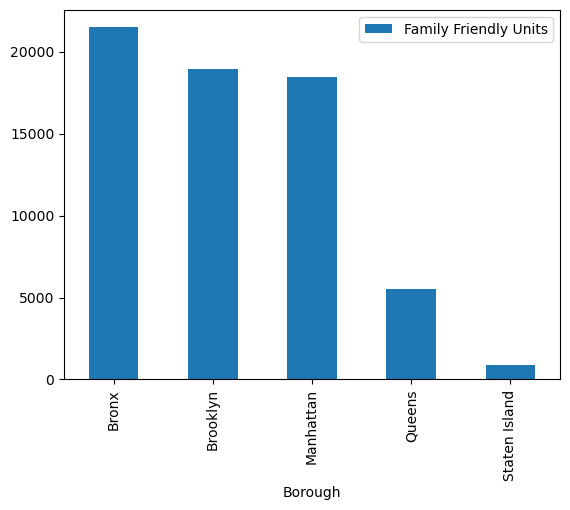

In [45]:
borocount.plot.bar(x="Borough", y="Family Friendly Units")

Calculating percent of units that are family friendly

In [46]:
percent_family_friendly = df2["Family Friendly Units"].sum() / df2["Total Units"].sum()
percent_family_friendly = percent_family_friendly*100
print(f"{percent_family_friendly:,.2f}%")


34.25%


### Which projects have the greatest/least number units for seniors?

In [47]:
#h.	Which projects have the greatest/least number units for seniors?
#df.loc[df['Senior Units'].idxmax()]
df.loc[df['Senior Units'].idxmax()]

Project ID                                             68177
Project Name                   CAPITOL APARTMENTS HDFC.HUDMF
Program Group                    Multifamily Finance Program
Project Start Date                       2019-06-28 00:00:00
Project Completion Date                  2019-06-28 00:00:00
Extended Affordability Only                              Yes
Prevailing Wage Status                   Non Prevailing Wage
Planned Tax Benefit                               Article XI
Extremely Low Income Units                               239
Very Low Income Units                                      6
Low Income Units                                           2
Moderate Income Units                                      3
Middle Income Units                                       27
Other Income Units                                         1
Counted Rental Units                                     278
Counted Homeownership Units                                0
All Counted Units       

In [48]:
most_senior_units = df.groupby('Project Name').sum().reset_index()
most_senior_units.sort_values('Senior Units', ascending=False)

,Project Name,Project ID,Extremely Low Income Units,Very Low Income Units,Low Income Units,Moderate Income Units,Middle Income Units,Other Income Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units,Senior Units,Project Duration,Project Start Year,Project End Year,All low income,Percent Low Income
1147,CAPITOL APARTMENTS HDFC.HUDMF,68177,239,6,2,3,27,1,278,0,278,278,249,0,2019,2019,247,88.85
1507,O+O. 1611 & 1701 PURDY STREET. PARKCHESTER GAR...,68160,220,0,0,0,0,1,221,0,221,221,220,959,2020,2023,220,99.55
1282,FRIENDSET APTS HDFC.HUDMF.FY18,65341,250,4,1,4,0,0,259,0,259,259,206,1106,2018,2021,255,98.46
1594,SKA MARIN. 1918 FIRST AVE. DRAPER HALL,48646,202,0,0,0,0,1,203,0,203,203,202,1070,2014,2017,202,99.51
1068,ARKER. 888 FOUNTAIN AVE. BUILDING B1,63289,199,0,0,0,0,1,200,0,200,200,199,1113,2017,2020,199,99.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,321 East 60th Street,54366,0,0,20,0,0,0,20,0,20,21,0,868,2015,2017,20,95.24
588,3208 GLENWOOD ROAD,68626,0,0,0,0,3,0,3,0,3,9,0,211,2019,2020,0,0.00
587,3206 GLENWOOD ROAD,68625,0,0,0,0,3,0,3,0,3,9,0,190,2019,2019,0,0.00
586,320 WEST 135TH STREET APARTMENTS,72192,0,0,0,0,6,0,6,0,6,17,0,143,2022,2022,0,0.00


In [49]:
df["Percent Senior"] = round((df["Senior Units"]/df["Total Units"])*100,2)

Show units with the highest percentage of senior units

In [50]:
df.sort_values(by=["Percent Senior"], ascending=False).dropna().head(50)

,Project ID,Project Name,Program Group,Project Start Date,Project Completion Date,Extended Affordability Only,Prevailing Wage Status,Planned Tax Benefit,Extremely Low Income Units,Very Low Income Units,Low Income Units,Moderate Income Units,Middle Income Units,Other Income Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units,Senior Units,Project Duration,Project Start Year,Project End Year,All low income,Percent Low Income,Percent Senior
137,50388,TWEEMILL HOUSE HDFC,Multifamily Incentives Program,2015-06-29,2015-06-29,Yes,Non Prevailing Wage,Article XI,0,40,0,0,0,0,40,0,40,40,40,0,2015,2015,40,100.00,100.00
138,50390,St Barnabas Housing For The Elderly,Multifamily Incentives Program,2014-06-24,2014-06-24,Yes,Non Prevailing Wage,Article XI,0,0,90,0,0,1,91,0,91,91,91,0,2014,2014,90,98.90,100.00
377,53553,Pio Mendez / VIP,Multifamily Incentives Program,2014-12-30,2014-12-30,Yes,Non Prevailing Wage,Article XI,0,182,0,0,0,0,182,0,182,182,182,0,2014,2014,182,100.00,100.00
825,58876,NEW VISION COMMUNITY REDEVELOPMENT HDFC,Multifamily Finance Program,2017-02-02,2019-08-15,No,Non Prevailing Wage,Article XI,187,3,2,0,0,2,194,0,194,194,194,924,2017,2019,192,98.97,100.00
671,57668,WSFSSH. 275 EAST138TH ST. TRES PUENTES,Multifamily Finance Program,2016-05-19,2018-12-31,No,Prevailing Wage,420c,175,0,0,0,0,0,175,0,175,175,175,956,2016,2018,175,100.00,100.00
833,58908,Monsignor Alexius Jarka Hall,Multifamily Finance Program,2016-03-23,2017-03-27,No,Non Prevailing Wage,Article XI,55,4,4,0,0,0,63,0,63,63,63,369,2016,2017,63,100.00,100.00
246,52319,Chinatown Planning Council HDFC,Multifamily Incentives Program,2014-06-30,2014-06-30,Yes,Non Prevailing Wage,Article XI,0,155,0,0,0,0,155,0,155,155,155,0,2014,2014,155,100.00,100.00
1608,66556,BEREAN HDFC.HUDMF.FY18,Multifamily Finance Program,2018-06-25,2018-06-25,Yes,Non Prevailing Wage,Article XI,67,8,1,0,0,1,77,0,77,77,77,0,2018,2018,76,98.70,100.00
511,55343,ACRMD LUBIN,Multifamily Incentives Program,2015-04-23,2015-04-23,Yes,Non Prevailing Wage,Article XI,0,25,0,0,0,0,25,0,25,25,25,0,2015,2015,25,100.00,100.00
505,55238,JOHN PAUL II APARTMENTS,Multifamily Finance Program,2016-02-10,2017-05-01,No,Non Prevailing Wage,Article XI,0,69,0,0,0,0,69,0,69,69,69,446,2016,2017,69,100.00,100.00


Find projects that have senior in the name

In [51]:
df[(df["Project Name"].str.contains("Senior")) | (df["Project Name"].str.contains("SENIOR")) | (df["Project Name"].str.contains("Elderly")) | (df["Project Name"].str.contains("ELDERLY"))].dropna().sort_values(by=["Percent Senior"], ascending=False).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 138 to 1495
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Project ID                   14 non-null     int64         
 1   Project Name                 14 non-null     object        
 2   Program Group                14 non-null     object        
 3   Project Start Date           14 non-null     datetime64[ns]
 4   Project Completion Date      14 non-null     datetime64[ns]
 5   Extended Affordability Only  14 non-null     object        
 6   Prevailing Wage Status       14 non-null     object        
 7   Planned Tax Benefit          14 non-null     object        
 8   Extremely Low Income Units   14 non-null     int64         
 9   Very Low Income Units        14 non-null     int64         
 10  Low Income Units             14 non-null     int64         
 11  Moderate Income Units        14 non-null   

In [52]:
df[(df["Project Name"].str.contains("Senior")) | (df["Project Name"].str.contains("SENIOR")) | (df["Project Name"].str.contains("Elderly")) | (df["Project Name"].str.contains("ELDERLY"))].dropna().sort_values(by=["Percent Senior"], ascending=False)

,Project ID,Project Name,Program Group,Project Start Date,Project Completion Date,Extended Affordability Only,Prevailing Wage Status,Planned Tax Benefit,Extremely Low Income Units,Very Low Income Units,Low Income Units,Moderate Income Units,Middle Income Units,Other Income Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units,Senior Units,Project Duration,Project Start Year,Project End Year,All low income,Percent Low Income,Percent Senior
138,50390,St Barnabas Housing For The Elderly,Multifamily Incentives Program,2014-06-24,2014-06-24,Yes,Non Prevailing Wage,Article XI,0,0,90,0,0,1,91,0,91,91,91,0,2014,2014,90,98.90,100.00
2112,68431,MARIEN-HEIM TOWER SENIOR APARTMENTS (20140280),Multifamily Incentives Program,2014-11-25,2017-05-03,No,Non Prevailing Wage,Article II,0,0,181,0,0,1,182,0,182,182,181,890,2014,2017,181,99.45,99.45
2287,69042,DUNN. 401 CHESTER STREET. MARCUS GARVEY SENIORS,Multifamily Finance Program,2021-04-29,2023-08-17,No,Prevailing Wage,420c,156,0,0,0,0,1,157,0,157,157,156,840,2021,2023,156,99.36,99.36
1090,61842,BFC. 118 ST EDWARDS STREET. INGERSOLL SENIOR R...,Multifamily Finance Program,2017-06-28,2020-01-27,No,Prevailing Wage,420c,145,0,0,0,0,1,146,0,146,146,145,943,2017,2020,145,99.32,99.32
769,58514,CABS Senior Housing (20140198),Multifamily Incentives Program,2014-05-09,2016-07-14,No,Non Prevailing Wage,420c,0,0,110,0,0,1,111,0,111,111,110,797,2014,2016,110,99.10,99.10
1207,63734,BRISA. 1488 NY AVE. BPHN SENIOR RESIDENCES,Multifamily Finance Program,2018-10-18,2021-03-01,No,Prevailing Wage,420c,88,0,0,0,0,1,89,0,89,89,88,865,2018,2021,88,98.88,98.88
1277,64157,E.M. MOORE HOUSING FOR THE ELDERLY,Multifamily Incentives Program,2017-10-04,2017-10-04,Yes,Non Prevailing Wage,Article XI,0,0,88,0,0,1,89,0,89,89,88,0,2017,2017,88,98.88,98.88
1332,64829,RB.63-85 E 233RD ST.WOODLAWN SENIOR HOUSES,Multifamily Finance Program,2019-08-15,2021-08-31,No,Prevailing Wage,420c,79,0,0,0,0,1,80,0,80,80,79,747,2019,2021,79,98.75,98.75
1553,65856,WYATT TEE WALKER HOUSING FOR THE ELDERLY,Multifamily Incentives Program,2017-11-08,2017-11-08,Yes,Non Prevailing Wage,Article XI,0,24,55,0,0,1,80,0,80,80,79,0,2017,2017,79,98.75,98.75
2115,68444,GRACE EPISCOPAL SENIOR,Multifamily Finance Program,2020-07-15,2021-06-17,No,Non Prevailing Wage,Article XI,78,1,0,0,0,1,80,0,80,80,79,337,2020,2021,79,98.75,98.75


How much total senior housing is there?

In [53]:
df["Senior Units"].sum()

9979

What percent of total housing is that?

In [54]:
percent_senior_housing = df['Senior Units'].sum() / df['Total Units'].sum()
percent_senior_housing = percent_senior_housing*100
print(f"{percent_senior_housing:,.2f}%")

5.23%


The following code shows projects and the maximum units. The code returns the whole row and shows the project id that has the max/min. We decided to seperate them by units(2-BR, 3-BR, etc...).


## Which project has the greatest number of family friendly units i.e. units with at least 2 bedrooms?

In [55]:
df2.loc[df2['6-BR+ Units'].idxmax()]

Project ID                                              65392
Project Name                          TAINO TOWERS.HUDMF.FY19
Project Start Date                        2021-06-30 00:00:00
Project Completion Date                   2021-06-30 00:00:00
Building ID                                            1339.0
Number                                                   2391
Street                                               2 AVENUE
Borough                                             Manhattan
Postcode                                              10035.0
BBL                                              1017870080.0
BIN                                                 1054629.0
Community Board                                         MN-11
Council District                                          8.0
Census Tract                                              194
NTA - Neighborhood Tabulation Area                       MN34
Latitude                                            40.801081
Longitud

In [56]:
#Returns the highest for 6+ Bedroom units
df2[df2['6-BR+ Units']==df2['6-BR+ Units'].max()]


,Project ID,Project Name,Project Start Date,Project Completion Date,Building ID,Number,Street,Borough,Postcode,BBL,BIN,Community Board,Council District,Census Tract,NTA - Neighborhood Tabulation Area,Latitude,Longitude,Latitude (Internal),Longitude (Internal),Building Completion Date,Reporting Construction Type,Extended Affordability Only,Prevailing Wage Status,Extremely Low Income Units,Very Low Income Units,Low Income Units,Moderate Income Units,Middle Income Units,Other Income Units,Studio Units,1-BR Units,2-BR Units,3-BR Units,4-BR Units,5-BR Units,6-BR+ Units,Unknown-BR Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units,Project Duration,Project Start Year,Project End Year,Family Friendly Units
2953,65392,TAINO TOWERS.HUDMF.FY19,2021-06-30,2021-06-30,1339.0,2391,2 AVENUE,Manhattan,10035.0,1.017870e+09,1054629.0,MN-11,8.0,194,MN34,40.801081,-73.934718,40.80153,-73.935371,06/27/2019,Preservation,Yes,Non Prevailing Wage,69,14,7,1,1,0,0,0,0,64,0,0,28,0,92,0,92,92,0.0,2021.0,2021.0,92


In [57]:
#Returns the highest for 2 Bedroom units
df2[df2['2-BR Units']==df2['2-BR Units'].max()]

,Project ID,Project Name,Project Start Date,Project Completion Date,Building ID,Number,Street,Borough,Postcode,BBL,BIN,Community Board,Council District,Census Tract,NTA - Neighborhood Tabulation Area,Latitude,Longitude,Latitude (Internal),Longitude (Internal),Building Completion Date,Reporting Construction Type,Extended Affordability Only,Prevailing Wage Status,Extremely Low Income Units,Very Low Income Units,Low Income Units,Moderate Income Units,Middle Income Units,Other Income Units,Studio Units,1-BR Units,2-BR Units,3-BR Units,4-BR Units,5-BR Units,6-BR+ Units,Unknown-BR Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units,Project Duration,Project Start Year,Project End Year,Family Friendly Units
6703,50583,SECOND ATLANTIC TERMINAL HOUSING CORPORATION,NaT,NaT,217149.0,475,CARLTON AVENUE,Brooklyn,11238.0,3.020070e+09,3321981.0,BK-02,35.0,179,BK68,40.683478,-73.970918,40.684,-73.970445,06/29/2017,Preservation,No,Non Prevailing Wage,0,0,305,0,0,0,0,0,305,0,0,0,0,0,0,305,305,305,NaN,NaN,NaN,305


In [58]:
#Returns the highest for 3 Bedroom units
df2[df2['3-BR Units']==df2['3-BR Units'].max()]

,Project ID,Project Name,Project Start Date,Project Completion Date,Building ID,Number,Street,Borough,Postcode,BBL,BIN,Community Board,Council District,Census Tract,NTA - Neighborhood Tabulation Area,Latitude,Longitude,Latitude (Internal),Longitude (Internal),Building Completion Date,Reporting Construction Type,Extended Affordability Only,Prevailing Wage Status,Extremely Low Income Units,Very Low Income Units,Low Income Units,Moderate Income Units,Middle Income Units,Other Income Units,Studio Units,1-BR Units,2-BR Units,3-BR Units,4-BR Units,5-BR Units,6-BR+ Units,Unknown-BR Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units,Project Duration,Project Start Year,Project End Year,Family Friendly Units
3939,62209,ADEE TOWER APARTMENTS INC.HRP.FY18,2023-06-02,2023-06-02,52029.0,3000,BRONX PARK EAST,Bronx,10467.0,2.043360e+09,2000000.0,BX-12,15.0,334,BX99,40.856676,-73.875859,40.86224,-73.873047,08/20/2020,Preservation,No,Non Prevailing Wage,247,45,0,0,0,0,0,3,96,193,0,0,0,0,0,292,292,292,0.0,2023.0,2023.0,289


In [59]:
#Returns the highest for 4 Bedroom units
df2[df2['4-BR Units']==df2['4-BR Units'].max()]

,Project ID,Project Name,Project Start Date,Project Completion Date,Building ID,Number,Street,Borough,Postcode,BBL,BIN,Community Board,Council District,Census Tract,NTA - Neighborhood Tabulation Area,Latitude,Longitude,Latitude (Internal),Longitude (Internal),Building Completion Date,Reporting Construction Type,Extended Affordability Only,Prevailing Wage Status,Extremely Low Income Units,Very Low Income Units,Low Income Units,Moderate Income Units,Middle Income Units,Other Income Units,Studio Units,1-BR Units,2-BR Units,3-BR Units,4-BR Units,5-BR Units,6-BR+ Units,Unknown-BR Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units,Project Duration,Project Start Year,Project End Year,Family Friendly Units
5375,60470,Omni - Plaza,NaT,NaT,329071.0,23,NEW LOTS AVENUE,Brooklyn,11212.0,3.036280e+09,3326600.0,BK-16,42.0,920,BK81,40.656943,-73.904044,40.65767,-73.904612,06/22/2016,Preservation,Yes,Non Prevailing Wage,135,14,236,0,0,0,0,86,188,59,52,0,0,0,385,0,385,385,NaN,NaN,NaN,299


In [60]:
#Returns the highest for 5 Bedroom units
df2[df2['5-BR Units']==df2['5-BR Units'].max()]

,Project ID,Project Name,Project Start Date,Project Completion Date,Building ID,Number,Street,Borough,Postcode,BBL,BIN,Community Board,Council District,Census Tract,NTA - Neighborhood Tabulation Area,Latitude,Longitude,Latitude (Internal),Longitude (Internal),Building Completion Date,Reporting Construction Type,Extended Affordability Only,Prevailing Wage Status,Extremely Low Income Units,Very Low Income Units,Low Income Units,Moderate Income Units,Middle Income Units,Other Income Units,Studio Units,1-BR Units,2-BR Units,3-BR Units,4-BR Units,5-BR Units,6-BR+ Units,Unknown-BR Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units,Project Duration,Project Start Year,Project End Year,Family Friendly Units
2775,68661,HERITAGE HOLDINGS HDFC.HPO.FY20,NaT,NaT,805033.0,1660,MADISON AVENUE,Manhattan,10029.0,1.016160e+09,1085254.0,MN-11,9.0,17402,MN33,40.796457,-73.947439,40.7968,-73.94814,10/23/2019,Preservation,Yes,Non Prevailing Wage,0,0,1,2,13,0,0,0,0,0,9,7,0,0,16,0,16,56,NaN,NaN,NaN,16


In [61]:
#h.	Which projects have the greatest/least number units for seniors?
df.loc[df['Senior Units'].idxmax()]

Project ID                                             68177
Project Name                   CAPITOL APARTMENTS HDFC.HUDMF
Program Group                    Multifamily Finance Program
Project Start Date                       2019-06-28 00:00:00
Project Completion Date                  2019-06-28 00:00:00
Extended Affordability Only                              Yes
Prevailing Wage Status                   Non Prevailing Wage
Planned Tax Benefit                               Article XI
Extremely Low Income Units                               239
Very Low Income Units                                      6
Low Income Units                                           2
Moderate Income Units                                      3
Middle Income Units                                       27
Other Income Units                                         1
Counted Rental Units                                     278
Counted Homeownership Units                                0
All Counted Units       

In [62]:
#Returns entire row for max
df[df['Senior Units']==df['Senior Units'].max()]

,Project ID,Project Name,Program Group,Project Start Date,Project Completion Date,Extended Affordability Only,Prevailing Wage Status,Planned Tax Benefit,Extremely Low Income Units,Very Low Income Units,Low Income Units,Moderate Income Units,Middle Income Units,Other Income Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units,Senior Units,Project Duration,Project Start Year,Project End Year,All low income,Percent Low Income,Percent Senior
2027,68177,CAPITOL APARTMENTS HDFC.HUDMF,Multifamily Finance Program,2019-06-28,2019-06-28,Yes,Non Prevailing Wage,Article XI,239,6,2,3,27,1,278,0,278,278,249,0,2019,2019,247,88.85,89.57


In [63]:
# Projects with no senior units
df[df['Senior Units']==df['Senior Units'].min()]

,Project ID,Project Name,Program Group,Project Start Date,Project Completion Date,Extended Affordability Only,Prevailing Wage Status,Planned Tax Benefit,Extremely Low Income Units,Very Low Income Units,Low Income Units,Moderate Income Units,Middle Income Units,Other Income Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units,Senior Units,Project Duration,Project Start Year,Project End Year,All low income,Percent Low Income,Percent Senior
0,44218,MEC E. 125TH ST. PARCEL B WEST,Multifamily Finance Program,2018-12-31,2022-02-16,No,Non Prevailing Wage,Article XI,0,101,101,0,93,2,297,0,297,404,0,1143,2018,2022,202,50.00,0.0
2,44225,Brook Avenue Apartments,Multifamily Finance Program,2014-06-27,2016-12-28,No,Non Prevailing Wage,421a,0,14,51,0,0,1,66,0,66,66,0,915,2014,2016,65,98.48,0.0
3,44230,Mermaid / West. 16th Street,Small Homes Program,2015-06-30,2017-07-21,No,Non Prevailing Wage,UDAAP,0,0,0,16,5,0,14,7,21,21,0,752,2015,2017,0,0.00,0.0
4,44239,Home for Harlem Dowling,Multifamily Finance Program,2014-06-30,2016-12-29,No,Non Prevailing Wage,420c,12,0,47,0,0,1,60,0,60,60,0,913,2014,2016,59,98.33,0.0
5,44256,WSFSSH. 145 WEST 108TH ST. VALLEY LODGE,Multifamily Finance Program,2018-12-31,2021-09-29,No,Non Prevailing Wage,NaN,129,0,69,0,0,1,199,0,199,199,0,1003,2018,2021,198,99.50,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4055,74524,CONFIDENTIAL,Homeowner Assistance Program,2023-09-22,2023-09-22,No,Non Prevailing Wage,NaN,0,0,1,0,0,0,0,1,1,1,0,0,2023,2023,1,100.00,0.0
4056,74526,CONFIDENTIAL,Homeowner Assistance Program,2023-09-29,2023-09-29,No,Non Prevailing Wage,NaN,0,0,1,0,0,0,0,1,1,1,0,0,2023,2023,1,100.00,0.0
4057,74531,CONFIDENTIAL,Homeowner Assistance Program,2023-09-29,2023-09-29,No,Non Prevailing Wage,NaN,0,0,1,0,0,0,0,1,1,1,0,0,2023,2023,1,100.00,0.0
4058,74533,CONFIDENTIAL,Homeowner Assistance Program,2023-09-11,2023-09-11,No,Non Prevailing Wage,NaN,0,0,1,0,0,0,0,1,1,1,0,0,2023,2023,1,100.00,0.0
